<a href="https://colab.research.google.com/github/piyalchakrs/PyTorch-Deep-Learning-/blob/main/02_Neural_Network_Classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Data

In [1]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [2]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [4]:
# Check different labels
circles.label.value_counts()

,count
label,
1,500
0,500


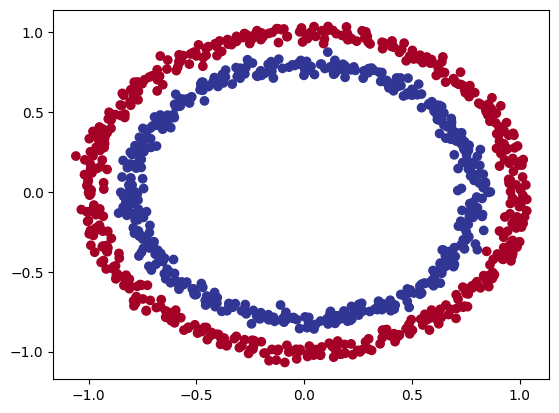

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### 1.1 Check input and output shape

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Values for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Values for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test split

In [8]:
import torch
torch.__version__

'2.6.0+cu124'

In [9]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [11]:
# split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2.Building model

In [13]:
import torch
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [15]:
# 1. construct a model that subclasses nn.module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
    # 3. define a forward method that outlines the forward pass
  def forward(self,x):
      return self.layer_2(self.layer_1(x)) # x--> layer_1 --> layer_2 --> o/p

# 4. instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
device

'cuda'

In [17]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [18]:
# let's replicate the model above using nn.sequential()
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1222, -0.1777],
                      [ 0.5571, -0.4543],
                      [-0.2949,  0.5826],
                      [ 0.3883,  0.1155],
                      [-0.0704,  0.5504]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.2997,  0.0212, -0.1472,  0.4912,  0.0620], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0932, -0.2123, -0.1126, -0.4088,  0.1710]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.1875], device='cuda:0'))])

In [20]:
# make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}")
print(f"Lenght of test samples: {len(X_test)}, Shape:{X_test.shape}")
print(f"\n First 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\n First 10 labels:\n {y_test[:10]}")

Length of predictions: 200
Lenght of test samples: 200, Shape:torch.Size([200, 2])

 First 10 predictions: 
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-0.]], device='cuda:0')

 First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [21]:
X_test[:10],  y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 setup loss function and optimizer

In [22]:
# setup of loss function
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=.1)

In [23]:
# calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 3.Training a model

### 3.1 Going from raw logits --> prediction probabilities --> prediction labels

In [24]:
# view the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2289],
        [-0.3071],
        [-0.2355],
        [-0.2262],
        [-0.5713]], device='cuda:0')

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [26]:
# use the sigmoid activation on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4430],
        [0.4238],
        [0.4414],
        [0.4437],
        [0.3609]], device='cuda:0')

y_pred_probs >=0.5, y=1 (class 1)\\
y_pred_probs <0.5, y=0 (class 0)


In [27]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
# In Full(logits --> pred probs --> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training & test loop

In [29]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# set the number of epochs
epochs = 100

# put data to target device'
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop

for epoch in range(epochs):
  ## training
  model_0.train()

  # forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # optimizer step(gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # calculate the test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    # print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:5f}, Acc: {acc:.2f}% | Test loss: {test_loss: .5f}, Test acc: {test_acc:.2f}&")




Epoch: 0 | Loss: 0.716624, Acc: 50.00% | Test loss:  0.71314, Test acc: 50.00&
Epoch: 10 | Loss: 0.704421, Acc: 50.00% | Test loss:  0.70227, Test acc: 50.00&
Epoch: 20 | Loss: 0.698960, Acc: 41.62% | Test loss:  0.69741, Test acc: 42.50&
Epoch: 30 | Loss: 0.696413, Acc: 45.62% | Test loss:  0.69515, Test acc: 47.50&
Epoch: 40 | Loss: 0.695176, Acc: 48.50% | Test loss:  0.69406, Test acc: 46.50&
Epoch: 50 | Loss: 0.694546, Acc: 48.62% | Test loss:  0.69352, Test acc: 48.50&
Epoch: 60 | Loss: 0.694202, Acc: 49.50% | Test loss:  0.69324, Test acc: 49.00&
Epoch: 70 | Loss: 0.693998, Acc: 49.50% | Test loss:  0.69309, Test acc: 48.00&
Epoch: 80 | Loss: 0.693865, Acc: 50.12% | Test loss:  0.69300, Test acc: 48.00&
Epoch: 90 | Loss: 0.693770, Acc: 50.00% | Test loss:  0.69296, Test acc: 47.50&


## 4.Make predictions and evaluate the model

In [30]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

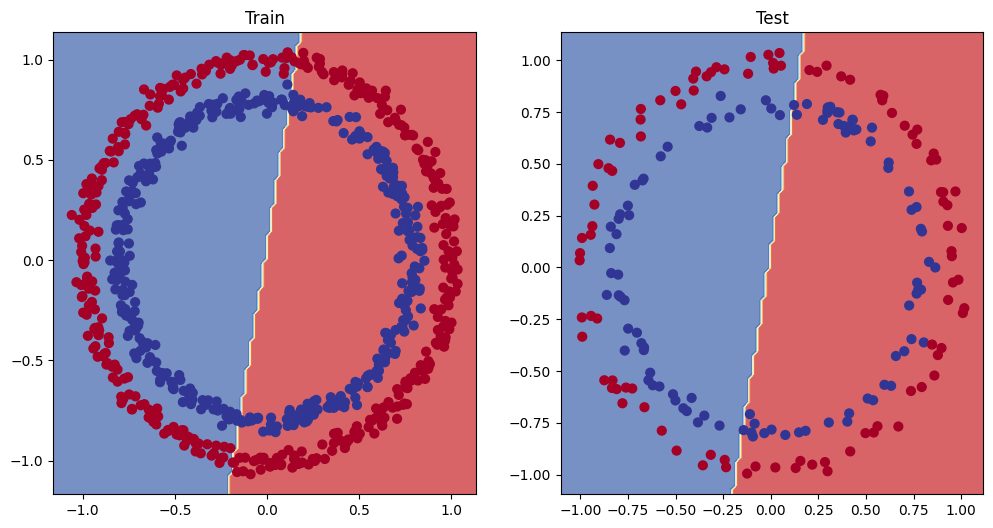

In [31]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5.Improving a model (from a model perspective)

* Add more layers
* Add more hidden units
* Fit for longer
* Changing the activation functions
* change the learning rate
* change the loss function

In [32]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 3 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    # 3. define a forward method that outlines the forward pass
  def forward(self,x):
      return self.layer_3(self.layer_2(self.layer_1(x))) # x--> layer_1 --> layer_2 --> o/p

# 4. instantiate an instance of our model class and send it to the target device
model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [34]:
# setup of loss function
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=.1)

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# set the number of epochs
epochs = 1000

# put data to target device'
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop

for epoch in range(epochs):
  ## training
  model_1.train()

  # forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # optimizer step(gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # calculate the test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    # print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:5f}, Acc: {acc:.2f}% | Test loss: {test_loss: .5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.693955, Acc: 50.88% | Test loss:  0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.693048, Acc: 50.38% | Test loss:  0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.692986, Acc: 51.12% | Test loss:  0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.692980, Acc: 51.62% | Test loss:  0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.692980, Acc: 51.12% | Test loss:  0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.692980, Acc: 51.00% | Test loss:  0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.692980, Acc: 51.00% | Test loss:  0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.692980, Acc: 51.00% | Test loss:  0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.692980, Acc: 51.00% | Test loss:  0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.692980, Acc: 51.00% | Test loss:  0.69468, Test acc: 46.00%


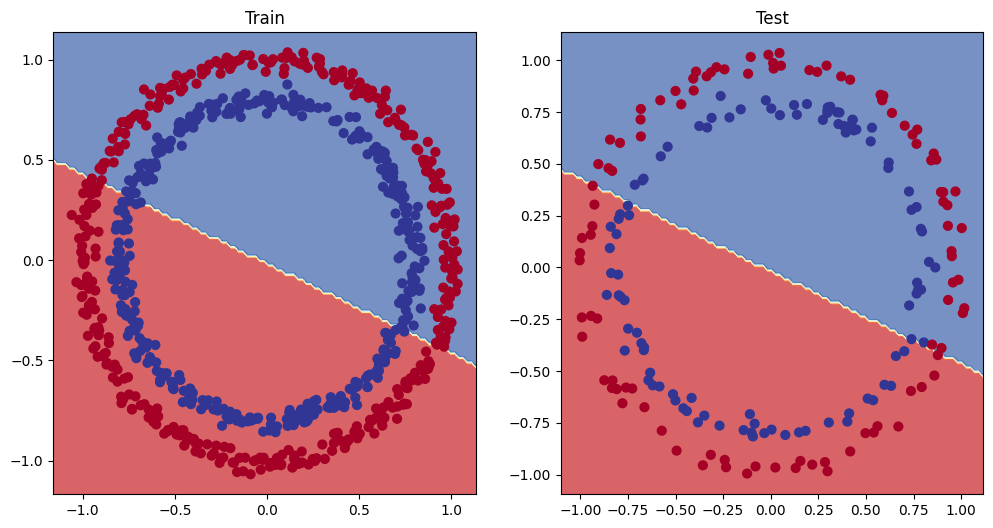

In [36]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 prepariing data to see if our model can fit a straight line

In [37]:
# create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias
# check the data
print(len(X_regression), len(y_regression))
X_regression[:5], y_regression[:5]

100 100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [38]:
# create train test split
train_test_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_test_split], y_regression[:train_test_split]
X_test_regression, y_test_regression = X_regression[train_test_split:], y_regression[train_test_split:]

# check the lengths of each
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

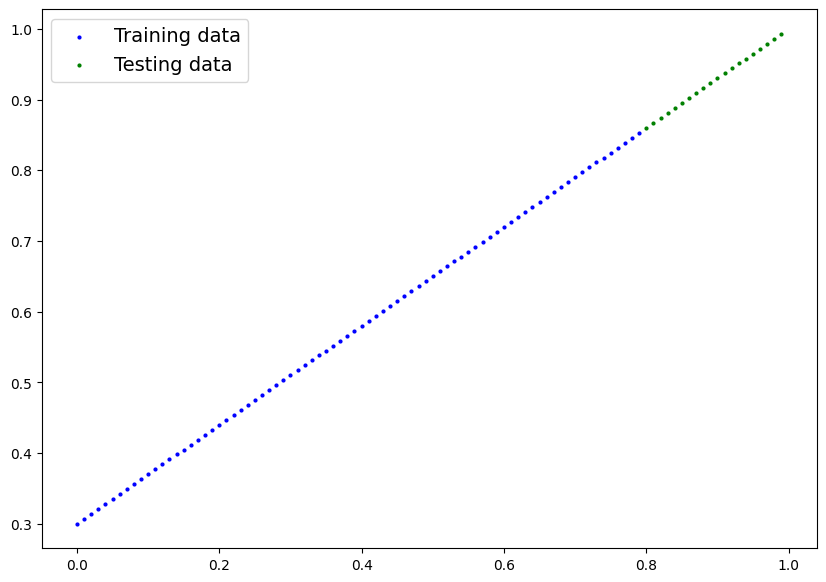

In [39]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [40]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 adjusting 'model_1' to fit a straight line

In [41]:
# same architecture as model_1 (but using nn.sequential())
model_2 = nn.Sequential(
    nn.Linear (in_features=1, out_features=10),
    nn.Linear (in_features=10, out_features=10),
    nn.Linear (in_features=10, out_features=1)
)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
# setup of loss function
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=.01)

In [43]:
model_2.to(device)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# set the number of epochs
epochs = 1000

# put data to target device'
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression).squeeze()
    test_loss = loss_fn(test_pred, y_test_regression)

  # print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:5f} |  Test loss: {test_loss: .5f}")



/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 | Loss: 0.759859 |  Test loss:  0.91103
Epoch: 100 | Loss: 0.028580 |  Test loss:  0.04606
Epoch: 200 | Loss: 0.025325 |  Test loss:  0.04582
Epoch: 300 | Loss: 0.021375 |  Test loss:  0.04561
Epoch: 400 | Loss: 0.019645 |  Test loss:  0.04554
Epoch: 500 | Loss: 0.019402 |  Test loss:  0.04557
Epoch: 600 | Loss: 0.019032 |  Test loss:  0.04559
Epoch: 700 | Loss: 0.018783 |  Test loss:  0.04562
Epoch: 800 | Loss: 0.018397 |  Test loss:  0.04564
Epoch: 900 | Loss: 0.017980 |  Test loss:  0.04565


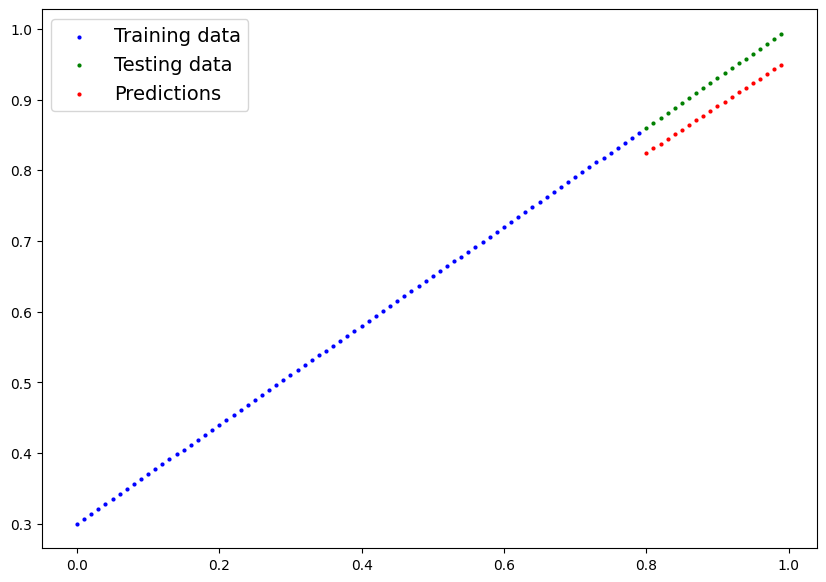

In [44]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6.The mising piece: non-linearity

### 6.1 Recreating non-linear data (red and blue circles)

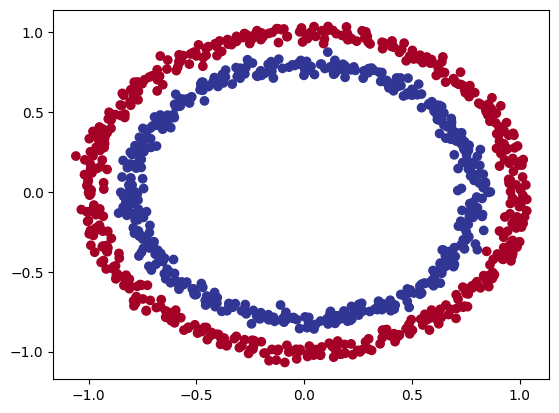

In [45]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y  = make_circles(n_samples,
                     noise=0.03,
                     random_state = 42)
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [46]:
# convert data to tensors
import torch
from sklearn.model_selection import train_test_split

# Assuming X, y are numpy arrays from make_circles
# If X, y are already tensors, skip these two lines
# Check if X is already a tensor
if not isinstance(X, torch.Tensor):
    X = torch.from_numpy(X).type(torch.float32)
if not isinstance(y, torch.Tensor):
    y = torch.from_numpy(y).type(torch.float32)

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [47]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 6.2 Building a model with non-linearity

In [48]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [49]:
# setup loass and optimizer function

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=.1)

### 6.3 Train a model with non-linearity

In [57]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# set the number of epochs
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()
  # forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  # optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # optimizer step(gradient descent)
  optimizer.step()

  ### Testing

  model_3.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # calculate the test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:5f}, Acc: {acc:.2f}% | Test loss: {test_loss: .5f}, Test acc: {test_acc: .2f}")

Epoch: 0 | Loss: 0.016708, Acc: 99.88% | Test loss:  0.03361, Test acc:  100.00
Epoch: 100 | Loss: 0.015770, Acc: 99.88% | Test loss:  0.03230, Test acc:  100.00
Epoch: 200 | Loss: 0.014931, Acc: 100.00% | Test loss:  0.03115, Test acc:  100.00
Epoch: 300 | Loss: 0.014173, Acc: 100.00% | Test loss:  0.03016, Test acc:  99.50
Epoch: 400 | Loss: 0.013489, Acc: 100.00% | Test loss:  0.02925, Test acc:  99.50
Epoch: 500 | Loss: 0.012870, Acc: 100.00% | Test loss:  0.02840, Test acc:  99.50
Epoch: 600 | Loss: 0.012306, Acc: 100.00% | Test loss:  0.02749, Test acc:  99.50
Epoch: 700 | Loss: 0.011791, Acc: 100.00% | Test loss:  0.02665, Test acc:  99.50
Epoch: 800 | Loss: 0.011318, Acc: 100.00% | Test loss:  0.02588, Test acc:  99.50
Epoch: 900 | Loss: 0.010881, Acc: 100.00% | Test loss:  0.02517, Test acc:  99.50


### 6.4 Evaluating a model trained with non-linear functions

In [58]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(X_test).squeeze()))

y_preds[:10], y_test[:10]

(tensor([[0.8246],
         [0.8312],
         [0.8377],
         [0.8443],
         [0.8509],
         [0.8574],
         [0.8640],
         [0.8706],
         [0.8771],
         [0.8837]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

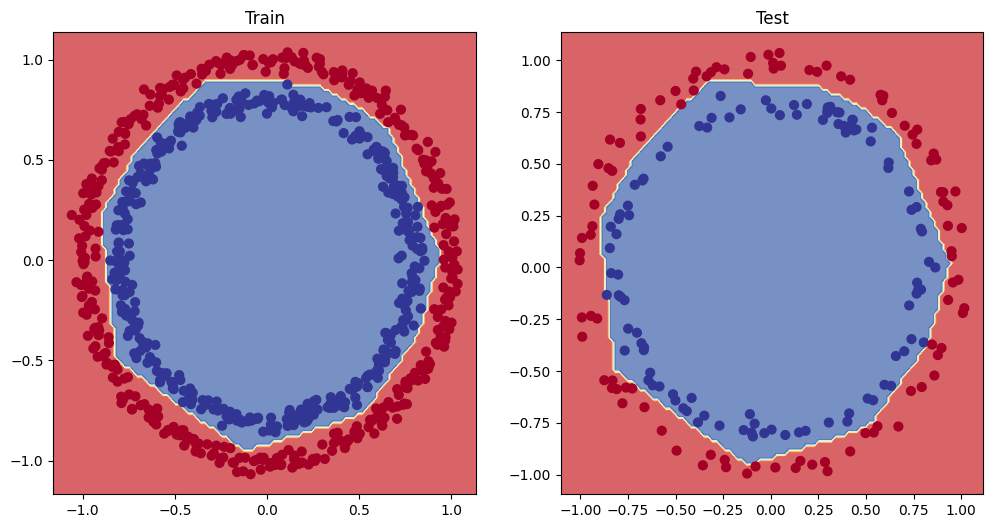

In [59]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


## 7.Putting it all together with a multi-class classification problem

### 7.1 Creating multi-class classification data

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


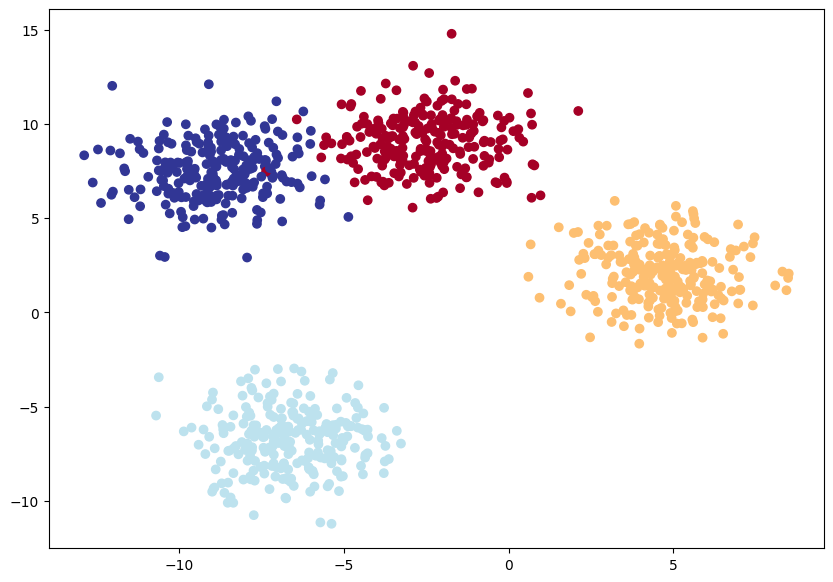

In [63]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5,
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 7.2 Building a multi-class classification model

In [64]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [67]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# create an instance of BlobModel and send it to the target device

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 7.3 create a loss fn and optimizer

In [68]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=.1)

### 7.4 getting prediction probablity for a multi-class model

In [71]:
# raw outputs of the model(logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_preds[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [72]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [74]:
# convert our model's logit outputs to prediction probabilities

y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [77]:
# convert our model's prediction pron=babilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [78]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 7.5 Creating a training and testing loop for a multi-class model

In [80]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

# put data on target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()
  # forward pass
  y_logits = model_4(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  # loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  # optimize zero grad
  optimizer.zero_grad()
  # loss backward
  loss.backward()
  # optimizer step
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_4(X_blob_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # loss
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

    # print
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:5f}, Acc: {acc:.2f}% | Test loss: {test_loss: .5f}, Test acc: {test_acc : .2f}")


Epoch: 0 | Loss: 0.033122, Acc: 99.25% | Test loss:  0.02433, Test acc:  99.50
Epoch: 10 | Loss: 0.031602, Acc: 99.25% | Test loss:  0.02261, Test acc:  99.50
Epoch: 20 | Loss: 0.030444, Acc: 99.25% | Test loss:  0.02126, Test acc:  99.50
Epoch: 30 | Loss: 0.029580, Acc: 99.25% | Test loss:  0.02022, Test acc:  99.50
Epoch: 40 | Loss: 0.028893, Acc: 99.25% | Test loss:  0.01940, Test acc:  99.50
Epoch: 50 | Loss: 0.028334, Acc: 99.25% | Test loss:  0.01872, Test acc:  99.50
Epoch: 60 | Loss: 0.027868, Acc: 99.25% | Test loss:  0.01815, Test acc:  99.50
Epoch: 70 | Loss: 0.027472, Acc: 99.25% | Test loss:  0.01766, Test acc:  99.50
Epoch: 80 | Loss: 0.027130, Acc: 99.25% | Test loss:  0.01723, Test acc:  99.50
Epoch: 90 | Loss: 0.026833, Acc: 99.25% | Test loss:  0.01685, Test acc:  99.50


### 7.6 Making and evaluating predictions with a PyTorch multi-class model

In [82]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ -0.8251,   7.4214,  -8.6492,  -9.6438],
        [ -2.4384,  -7.2530,  -4.4771,   4.0202],
        [ -4.1930,  -4.6251,   3.9723,  -3.1864],
        [ -1.4889,   5.2914,  -4.4613,  -5.5503],
        [  4.8179,  -1.4412, -10.3127,  -7.9953],
        [ -3.1214,  -8.6418,  -5.1784,   4.7837],
        [ -3.7127,  -3.9668,   3.4995,  -2.6344],
        [  4.2985,  -4.6856,  -7.8447,  -4.0603],
        [ -5.3360,  -5.9068,   4.8426,  -4.0999],
        [  4.4805,  -3.4720,  -8.5458,  -5.3922]], device='cuda:0')

In [83]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


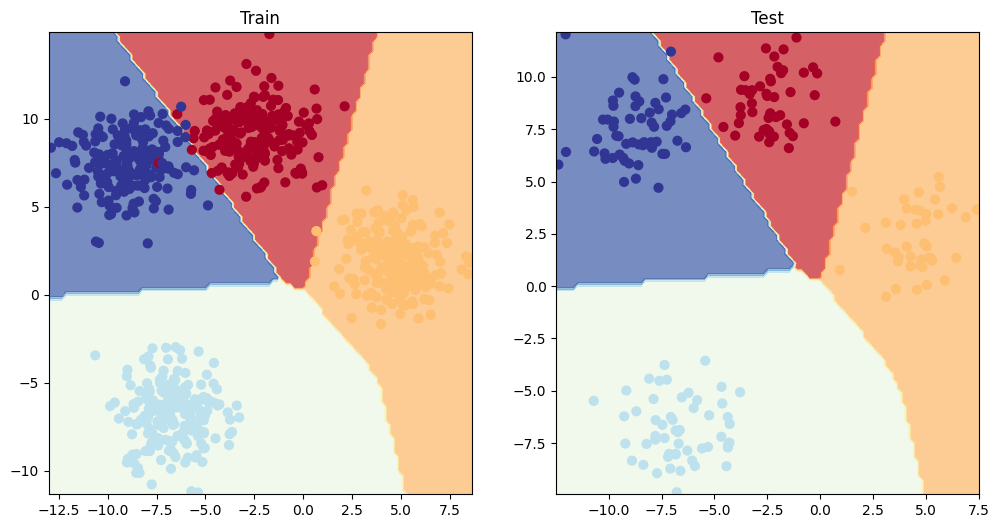

In [84]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)